<a href="https://colab.research.google.com/github/waqasahmad-developer/Polynomial-Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [6]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

#y = 0.8x^2 + 0.9x + 2    creating the y col using this formula also creating some randomnes

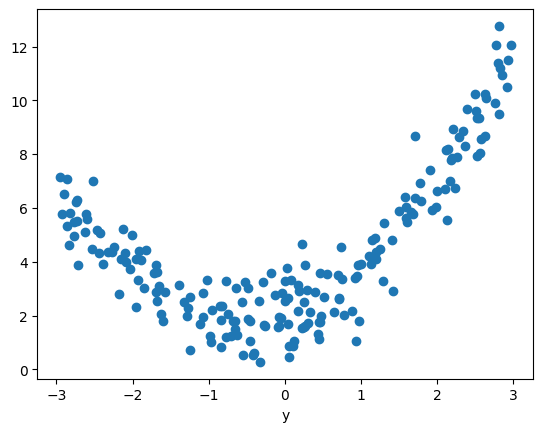

In [10]:
plt.scatter(X, y)
plt.xlabel('X')
plt.xlabel('y')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Applying linear regression normally**

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
r2_score(y_test, lr.predict(X_test))

# too bad result with normal linear regression

0.11913786332060372

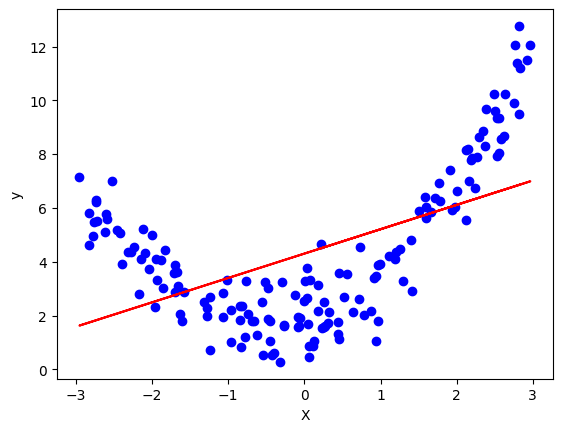

In [16]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Applying Polynomial Linear Regression**

In [18]:
# creating a poly object with the degree = 2
# include_bias is a parameter in the PolynomialFeatures class by default it is True if we set it to False then the transform cols will equal to degree value and for True the transform will be equal to degree + 1
poly = PolynomialFeatures(degree=2, include_bias= True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [19]:
print(X_train[0])
print(X_train_trans[0])

[2.83073836]
[1.         2.83073836 8.01307969]


In [20]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [22]:
r2_score(y_test, lr.predict(X_test_trans))  # there is a big improvement using polynomial regression

0.857047869722267

In [25]:
print(lr.coef_)
print(lr.intercept_)

# these values are nearly comes to the values which we i have used in the y col not exactly because of randomns

[[0.         0.80308235 0.8331829 ]]
[1.93282249]


In [26]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

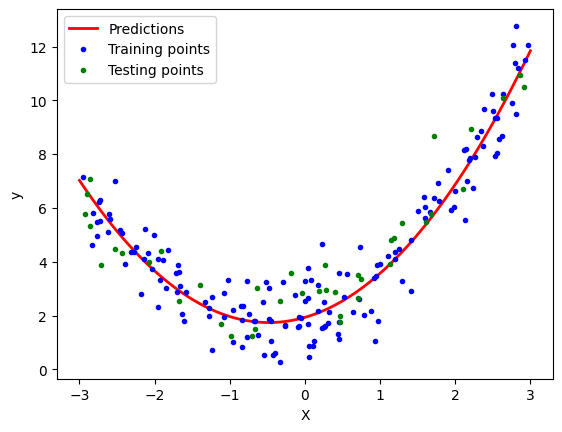

In [27]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [28]:
# a function through which we can check the prediction line for a custom degree which can be any value

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

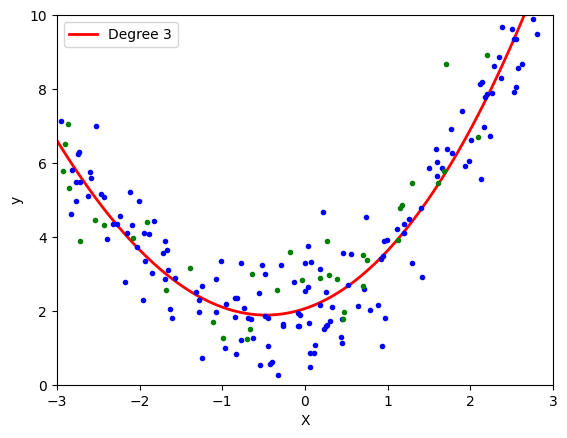

In [29]:
polynomial_regression(3)

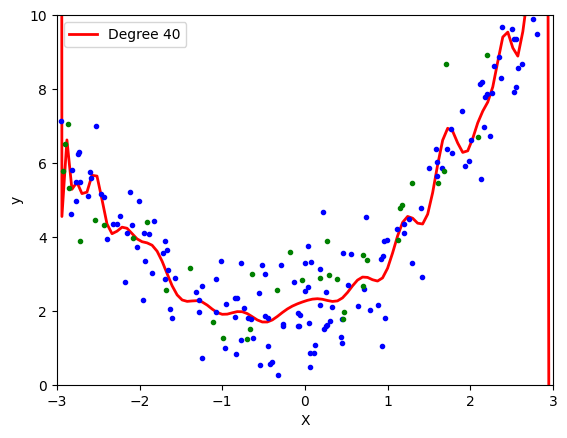

In [31]:
polynomial_regression(40)

# it is overfitting on a high degree value

In [32]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


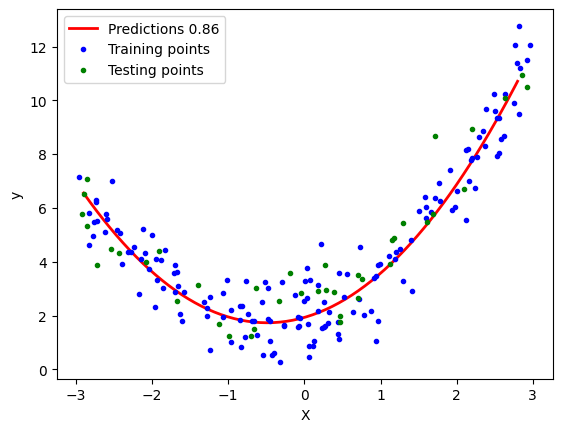

In [33]:
# Applying gradient descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans, y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**What if we have 3D data**

In [39]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [40]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [41]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [42]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [43]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [44]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [48]:
X_multi_trans.shape

(100, 496)

In [50]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [51]:
X_test_multi = poly.transform(final)

In [52]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [53]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()